In [1]:
import cv2
import os
import random
import numpy as np
from glob import glob
from TibetanImageOrientation.Inference import LineDetection, FlipDetection
from TibetanImageOrientation.Utils import show_image, rotate_from_angle, calculate_angle, randomly_rotate

In [2]:
line_detection = LineDetection()
flip_detector = FlipDetection("TibetanImageOrientation\Models\FlipClassifier_v2.onnx")

f:\Github\BDRC\tibetan-image-orientation\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


All Images: 6
(1005, 4000, 3)


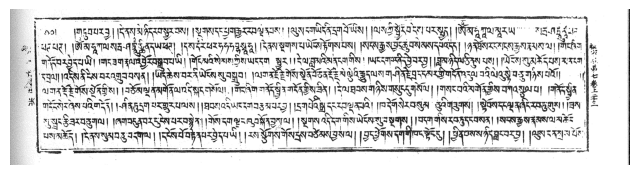

In [3]:
image_path = "Data"
all_images = glob(f"{image_path}/*.jpg")

print(f"All Images: {len(all_images)}")

idx = random.randint(0, len(all_images)-1)
test_image = cv2.imread(all_images[idx])
print(test_image.shape)
h, w, _ = test_image.shape

show_image(test_image)

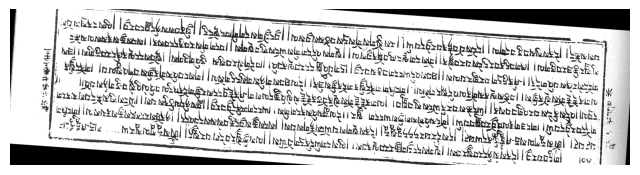

In [17]:
rot_img = randomly_rotate(test_image, limit = 10)
show_image(rot_img)

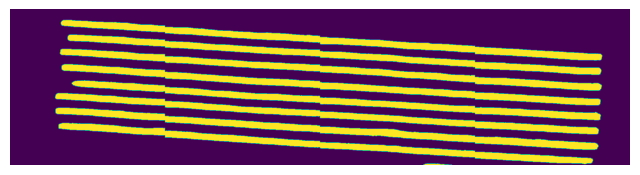

In [18]:
line_pred = line_detection.run(rot_img)
show_image(line_pred)

(1005, 4000)
Angle: 3.7109198570251465


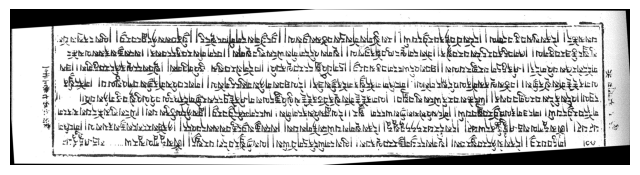

In [19]:
angle = calculate_angle(line_pred)
print(f"Angle: {angle}")
rotated_img = rotate_from_angle(rot_img, angle)

show_image(rotated_img)

(1005, 4000, 3)
Prediction: is_flipped: 1.0, is_correct: 0.0


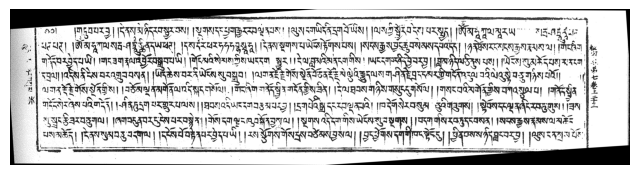

In [20]:
pred_slice, is_flipped, is_correct = flip_detector.run(rotated_img, slice=True)
print(f"Prediction: is_flipped: {is_flipped}, is_correct: {is_correct}")

if (is_flipped > 0.8):
    corrected_image = rotate_from_angle(rotated_img, 180)
    show_image(corrected_image)
else:
    show_image(rotated_img)